In [1]:
from zipfile import ZipFile
file_name = "chest_xray.zip"

with ZipFile(file_name, 'r') as zip:  
  zip.extractall()
  print('Done')

Done


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
TESTDIR = "chest_xray/test"

CATEGORIES = ["NORMAL", "PNEUMONIA"]

for category in CATEGORIES:  # do normal and pneumonia
    path = os.path.join(TESTDIR,category)  # create path to  normal and pneumonia
    for img in os.listdir(path):  # iterate over each image per  normal and pneumonia
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        

        break
    break 

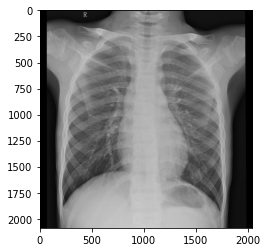

In [4]:
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()  # display!

In [5]:
print(img_array.shape)

(2087, 2043)


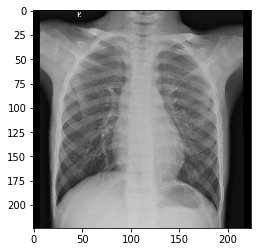

In [6]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do normal and pneumonia

        path = os.path.join(TESTDIR,category)  # create path to  normal and pneumonia
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=normal 1=pneumonia

        for img in tqdm(os.listdir(path)):  # iterate over each image per  normal and pneumonia
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 77/77 [00:00<00:00, 150.28it/s]

154


In [8]:
import random

random.shuffle(training_data)

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features) #images are appending one after another inside empty array
    y.append(label)#labels

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #converting into numpy array cause keras is not compatible with others
y = np.array(y)

In [10]:
import pickle #saving the data 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# import pickle

# pickle_in = open("X.pickle","rb")
# X = pickle.load(pickle_in)

# pickle_in = open("y.pickle","rb")
# y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs=16, validation_split=0.3)

Epoch 1/16
7/7 [==============================] - 18s 3s/step - loss: 0.7284 - accuracy: 0.5421 - val_loss: 0.6893 - val_accuracy: 0.5745
Epoch 2/16
7/7 [==============================] - 18s 3s/step - loss: 0.6971 - accuracy: 0.4673 - val_loss: 0.6927 - val_accuracy: 0.5745
Epoch 3/16
7/7 [==============================] - 18s 3s/step - loss: 0.6931 - accuracy: 0.5140 - val_loss: 0.6950 - val_accuracy: 0.4255
Epoch 4/16
7/7 [==============================] - 18s 3s/step - loss: 0.6926 - accuracy: 0.5327 - val_loss: 0.6962 - val_accuracy: 0.4255
Epoch 5/16
7/7 [==============================] - 18s 3s/step - loss: 0.6939 - accuracy: 0.5327 - val_loss: 0.7020 - val_accuracy: 0.4255
Epoch 6/16
7/7 [==============================] - 18s 3s/step - loss: 0.6912 - accuracy: 0.5327 - val_loss: 0.7014 - val_accuracy: 0.4255
Epoch 7/16
7/7 [==============================] - 18s 3s/step - loss: 0.6916 - accuracy: 0.5327 - val_loss: 0.7001 - val_accuracy: 0.4255
Epoch 8/16
7/7 [==================